<a href="https://colab.research.google.com/github/AbinayaVelusamy8098/Algorithmic-Trader/blob/main/Algorithmic_trader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy yfinance matplotlib scikit-learn


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
def fetch_data(ticker):
    data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
    return data

# Example usage
data = fetch_data("AAPL")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
def preprocess_data(data):
    data['Short_MA'] = data['Close'].rolling(window=50).mean()
    data['Long_MA'] = data['Close'].rolling(window=200).mean()
    data['Signal'] = 0
    data['Signal'][50:] = np.where(data['Short_MA'][50:] > data['Long_MA'][50:], 1, 0)
    data['Position'] = data['Signal'].diff()
    return data

data = preprocess_data(data)


<ipython-input-4-61c3eb685f1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['Short_MA'][50:] > data['Long_MA'][50:], 1, 0)


In [5]:
def backtest_strategy(data):
    initial_capital = float(10000.0)
    shares = 100

    # Create a DataFrame to hold positions and portfolio values
    positions = pd.DataFrame(index=data.index).fillna(0.0)
    positions['AAPL'] = shares * data['Signal']

    portfolio = positions.multiply(data['Close'], axis=0)
    pos_diff = positions.diff()

    # Calculate cash and total value of the portfolio
    portfolio['Cash'] = initial_capital - (pos_diff.multiply(data['Close'], axis=0)).sum(axis=1).cumsum()
    portfolio['Total'] = portfolio.sum(axis=1)

    return portfolio

portfolio = backtest_strategy(data)


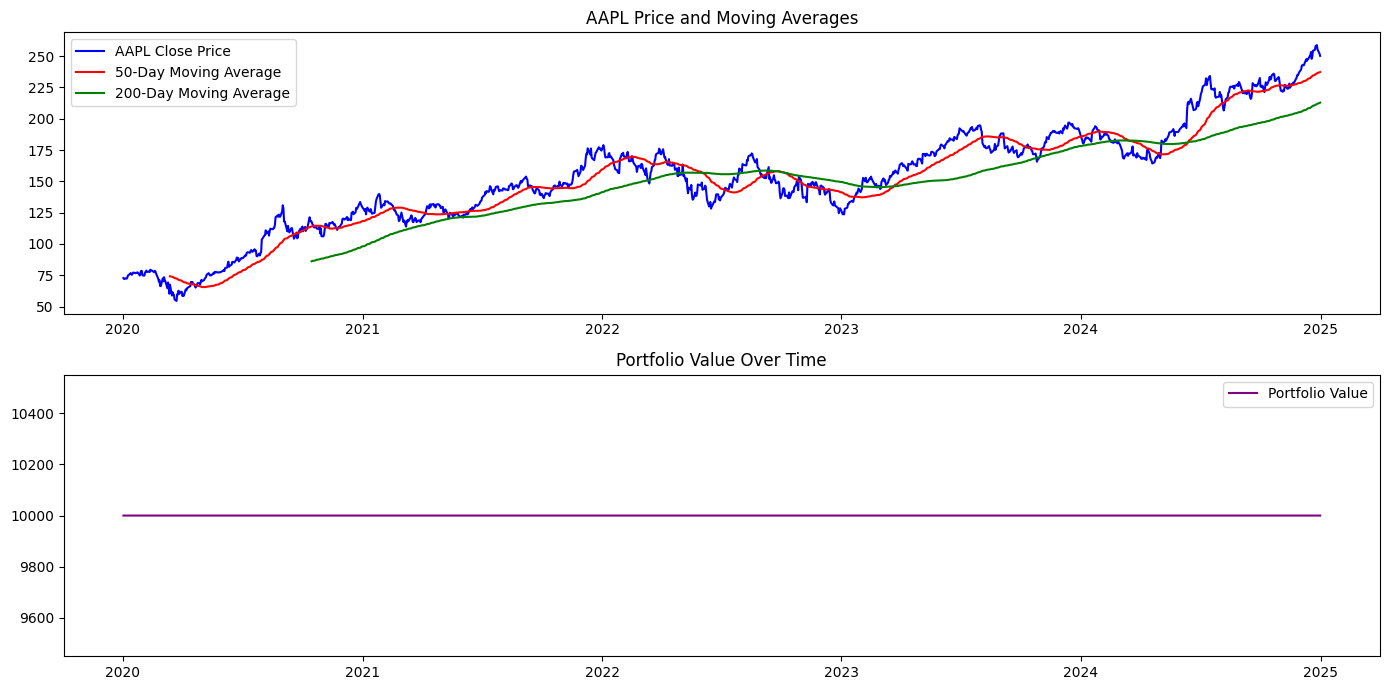

In [6]:
def plot_results(data, portfolio):
    plt.figure(figsize=(14,7))

    # Plotting price and moving averages
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='AAPL Close Price', color='blue')
    plt.plot(data['Short_MA'], label='50-Day Moving Average', color='red')
    plt.plot(data['Long_MA'], label='200-Day Moving Average', color='green')

    plt.title('AAPL Price and Moving Averages')
    plt.legend()

    # Plotting portfolio value over time
    plt.subplot(2, 1, 2)
    plt.plot(portfolio['Total'], label='Portfolio Value', color='purple')

    plt.title('Portfolio Value Over Time')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results(data, portfolio)
